# Sheet 2

**Link to the dataset**: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

# Pre-processing (same as part 1):

In [690]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/data/notebook_files/CVD_cleaned.csv')
# Binary columns transformation

df['Heart_Disease'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].map({'Female': 1, 'Male': 0})
# Dropping columns we don't need

df.drop(columns=['General_Health','Checkup','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Smoking_History','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption', 'Weight_(kg)', 'Height_(cm)'], inplace=True)
df.head()

,Heart_Disease,Sex,Age_Category,BMI,Alcohol_Consumption
0,0,1,70-74,14.54,0.0
1,1,1,70-74,28.29,0.0
2,0,1,60-64,33.47,4.0
3,1,0,75-79,28.73,0.0
4,0,0,80+,24.37,0.0


# Question 1

Our research question:

**Is there a difference in mean BMI between males and females?**

a. Mean value of alcohol consumption for each gender:

In [691]:
males_df = df[df['Sex'] == 0]
females_df = df[df['Sex'] == 1]
mean_BMI_males = males_df['BMI'].mean()
mean_BMI_females = females_df['BMI'].mean()
print("Mean BMI of males: {}".format(mean_BMI_males))
print("Mean BMI of females: {}".format(mean_BMI_females))

Mean BMI of males: 28.700612076040308
Mean BMI of females: 28.557167719543553


b. Confidence interval for mean BMI, for each gender:

In [692]:
n_males = len(males_df)
n_females = len(females_df)

# unbiased estimator for variance
BMI_var_males = males_df['BMI'].var()
BMI_var_females = females_df['BMI'].var()
# the se estimator for the mean is sqrt(var(BMI)/n)
se_males = ((1/n_males)*BMI_var_males)**(1/2)
se_females = ((1/n_females)*BMI_var_females)**(1/2)
# using the standard confidence level of 95%, the critical z values for the normal distribution is ~2.
CI_BMI_males = [mean_BMI_males - 2 * se_males, mean_BMI_males + 2 * se_males]
CI_BMI_females = [mean_BMI_females - 2 * se_females, mean_BMI_females + 2 * se_females]
print("CI for mean BMI of males (95% condifence level): {}".format(CI_BMI_males))
print("CI for mean BMI of females (95% condifence level): {}".format(CI_BMI_females))

CI for mean BMI of males (95% condifence level): [28.67009504064714, 28.731129111433475]
CI for mean BMI of females (95% condifence level): [28.521873006446658, 28.59246243264045]


We saw in the lectures that the average is an MLE for the mean and is asymptotically normal. Also note that we assume that BMI of different people are independent of each other, and we have more than enough samples from both categories to use the normal distribution assumption.

## Section C (ג)

We can see that there is NO overlap between the 2 confidence intervals.
The meaning of this result is that there is a statistically significant difference between the genders regarding mean BMI. 

# Question 2

## section a (א)


a.  H0: The mean BMI of men and women is the same.

H1: The mean BMI of men and women is different.

In mathematical notation, where $\mu_x$ is the mean BMI of men and $\mu_Y$ is the mean BMI of women:

$H_0: \mu_x - \mu_Y = 0$

$H_0: \mu_x - \mu_Y \neq 0$

## section B (ב)

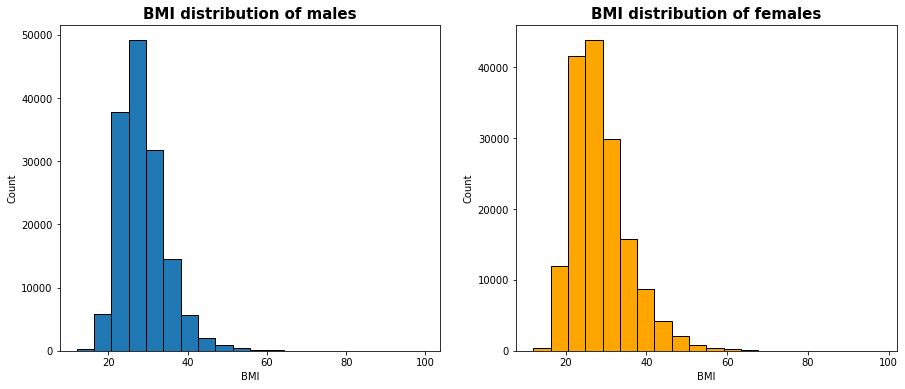

In [693]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

males_df['BMI'].hist(edgecolor="black", grid=False, bins=20, ax=ax1)
ax1.set_title("BMI distribution of males", size=15, fontweight="bold")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Count")

females_df['BMI'].hist(edgecolor="black", grid=False, bins=20, ax=ax2, color="orange")
ax2.set_title("BMI distribution of females", size=15, fontweight="bold")
ax2.set_xlabel("BMI")
ax2.set_ylabel("Count")

plt.show()

In [694]:
# using F test for equal variances
import scipy.stats as stats
F_statistic = max(females_df['BMI'].var(),males_df['BMI'].var()) / min(females_df['BMI'].var(),males_df['BMI'].var())
p_value = 1 - stats.f.cdf(F_statistic, n_males - 1, n_females - 1)
F_test_quantile = stats.f.ppf(0.95, n_males - 1, n_females - 1)

print("P value: {}".format(p_value))
print("F statistic value: {} , F test critical value:: {}".format(F_statistic, F_test_quantile))
print("Should reject H_0? {}".format(F_statistic > F_test_quantile))

P value: 1.1102230246251565e-16
F statistic value: 1.441444785266057 , F test critical value:: 1.0084116742595286
Should reject H_0? True


T-Test assumptions:
- Independent Samples: holds.
- Normality: Histograms have a bell shape but not a symmetrical one, so this assumption doesn't necessarily hold.
- Equal Variances: according to the F test above, doesn't hold.

## section C (ג)

In [695]:
# T test
alpha = 0.05
T_statistic, p_value = stats.ttest_ind(males_df['BMI'], females_df['BMI']) # 2 tail T-Test
print("P value: {}".format(p_value))
print("T statistic: {}".format(T_statistic))
print("Should reject H_0? {}".format(p_value < alpha))

P value: 1.0144387299235462e-09
T statistic: 6.107311046084703
Should reject H_0? True


## section D (ד)

In [696]:
# Wald test
wald_statistic = (mean_BMI_males - mean_BMI_females) / ((BMI_var_males / n_males + BMI_var_females / n_females) ** (1 / 2))
p_value = 2 * stats.norm.cdf(-abs(wald_statistic))
print("P value: {}".format(p_value))
print("Wald statistic: {}".format(wald_statistic))
print("Should reject H_0? {}".format(p_value < alpha))

P value: 7.811832459903407e-10
Wald statistic: 6.148704574641596
Should reject H_0? True


## section E (ה)

In both the T-test and the Wald test we rejected the null hypothesis and found p-values that are extremely small. It was to be expected based on the non-intersecting confidence intervals we found in q1. 

## section F (ו)

`f`. 
<img src="https://i.postimg.cc/MZ7z89pZ/fb4ba5affccba0bcb8f492405d26b35c.png">

In [697]:
#2.f
def get_sum(values, n_category, S_p_squared, variance_estimate, mu_estimate_category, mu_estimate_all):
    total_sum = 0
    for i in range(n_category):
        total_sum += (values[i] - mu_estimate_category) ** 2 / S_p_squared - (values[i] - mu_estimate_all) ** 2 / variance_estimate
    return total_sum

import math

S_p_squared = ((n_males-1)*BMI_var_males+(n_females-1)*BMI_var_females)/(n_males+n_females-2)

m_values = males_df["BMI"].values
f_values = females_df["BMI"].values

sample_variance = df["BMI"].var()
mean_BMI = df["BMI"].mean()
n = n_males + n_females
log_sum = n * math.log(sample_variance / S_p_squared)

males_sum = get_sum(m_values, n_males, S_p_squared, sample_variance, mean_BMI_males, mean_BMI)
females_sum = get_sum(f_values, n_females, S_p_squared, sample_variance, mean_BMI_females, mean_BMI)

statistic = log_sum - males_sum - females_sum
p_value = stats.chi2.sf(statistic, 1)

print(f"The LR-test statistic is: {statistic}, ")
print(f"p-value: {p_value}")
print(f"Should reject H_0? {p_value < alpha}")

The LR-test statistic is: 37.29723279208619, 
p-value: 1.0142842283915584e-09
Should reject H_0? True


# Question 3

## section A,B,C (א,ב,ג)

In [698]:
def wald_test_q3(sample_BMI_m, sample_BMI_f, sample_variance_males, sample_variance_females, sample_n_males, sample_n_females, section):
    q3_wald_statistic = (sample_BMI_m - sample_BMI_f) / ((sample_variance_males / sample_n_males + sample_variance_females / sample_n_females) ** 0.5)
    
    w_p_value = 2*stats.norm.cdf(-abs(q3_wald_statistic))

    if section == 'c':
        print("Performing Wald test: ")
        print("P value: {}".format(w_p_value))
        print("Wald statistic: {}".format(q3_wald_statistic))
        print(f"Should reject H_0?: {w_p_value < alpha}")
        print("*************")
    return w_p_value

In [699]:
CI_dict = {
    30: [0, 0],
    50: [0, 0],
    100: [0, 0],
    500: [0, 0]
}

def q3(section):
    """
    Performs random sampling of different sizes from the dataset, calculates wald test, CI.    
 
    Args:
        section: which section in q3 is being performed.
 
    Returns (relevant for section d only):
        CI_list_m (list): confidence interval of mean BMI of males for each of the sample sizes.
        CI_list_f (list): confidence interval of mean BMI of females for each of the sample sizes.
        p_values (list): p-values recieved by the wald test, for each of the sample sizes.

    """
    CI_list_m = {}
    CI_list_f = {}
    q3_p_values = {}

    for i in [30, 50, 100, 500]:
        sample_n_males = 0
        sample_n_females = 0

        # we want to make sure our data contains at least 1 sample from each group
        while sample_n_males == 0 or sample_n_females == 0:
            sample_df = df.sample(i)
            males_sample_df = sample_df[sample_df['Sex'] == 0]
            females_sample_df = sample_df[sample_df['Sex'] == 1]
            sample_n_males = len(males_sample_df['BMI'])
            sample_n_females = len(females_sample_df['BMI'])

        sample_mean_BMI_m = males_sample_df['BMI'].mean()
        sample_mean_BMI_f = females_sample_df['BMI'].mean()
        sample_var_BMI_m = males_sample_df['BMI'].var()
        sample_var_BMI_f = females_sample_df['BMI'].var()
        sample_se_m = ((1 / sample_n_males) * sample_var_BMI_m) ** (1 / 2)
        sample_se_f = ((1 / sample_n_females) * sample_var_BMI_f) ** (1 / 2)
        sample_CI_m = [sample_mean_BMI_m - 2 * sample_se_m, sample_mean_BMI_m + 2 * sample_se_m]
        sample_CI_f = [sample_mean_BMI_f - 2 * sample_se_f, sample_mean_BMI_f + 2 * sample_se_f]
        CI_males_length = sample_CI_m[1] - sample_CI_m[0]
        CI_females_length = sample_CI_f[1] - sample_CI_f[0]

        if section == 'b':
            print("sample size: {}".format(i))
            print("Confidence interval for BMI among males: {}, its length is: {}".format(sample_CI_m,CI_males_length))
            print("Confidence interval for BMI among females: {}, its length is: {}".format(sample_CI_f,CI_females_length))
            print()

        if section == 'c':
            print("sample size: {}".format(i))
            wald_test_q3(sample_mean_BMI_m, sample_mean_BMI_f, sample_var_BMI_m, sample_var_BMI_f, sample_n_males, sample_n_females, 'c')            

        if section == 'd':
            #checking if the mean for the entire data is within the sample CI
            if mean_BMI_males >= sample_CI_m[0] and mean_BMI_males <= sample_CI_m[1]:
                CI_dict[i][0] += 1
            if mean_BMI_females >= sample_CI_f[0] and mean_BMI_females <= sample_CI_f[1]:
                CI_dict[i][1] += 1

            q3_p_values[i] = wald_test_q3(sample_mean_BMI_m, sample_mean_BMI_f, sample_var_BMI_m, sample_var_BMI_f, sample_n_males, sample_n_females, False)
            CI_list_m[i] = CI_males_length
            CI_list_f[i] = CI_females_length
        


    return CI_list_m, CI_list_f, q3_p_values

## section B (ב)

In [700]:
#b
_, _, _ = q3('b')

sample size: 30
Confidence interval for BMI among males: [25.388930277966125, 32.02606972203388], its length is: 6.637139444067756
Confidence interval for BMI among females: [25.820957588190552, 33.13761384038088], its length is: 7.316656252190327

sample size: 50
Confidence interval for BMI among males: [25.72674144946854, 29.09040140767432], its length is: 3.36365995820578
Confidence interval for BMI among females: [24.742501655296806, 29.635680162885016], its length is: 4.89317850758821

sample size: 100
Confidence interval for BMI among males: [28.322446778748755, 32.02307046263056], its length is: 3.700623683881801
Confidence interval for BMI among females: [25.850953861360217, 28.944284233877866], its length is: 3.0933303725176486

sample size: 500
Confidence interval for BMI among males: [28.43465980784238, 30.057860517360872], its length is: 1.6232007095184926
Confidence interval for BMI among females: [27.83611747614479, 29.502780161650488], its length is: 1.666662685505699



*Q1 RECAP:*

CI for mean BMI of males (95% condifence level): [28.67009504064714, 28.731129111433475]

CI for mean BMI of females (95% condifence level): [28.521873006446658, 28.59246243264045]

In the making of CI in Q1, we considered the entire dataset which has ~15000 samples in each group, and we saw that the CI's did not intersect.
In this question, we used much smaller sample size. As a result we can see a trend (for the most part, due to the randomization) that as the sample size gets bigger, the length of the CI gets smaller. We can also see that the CI's of both groups intersect, which shows that the statistical difference between their means is less significant.

## section C (ג)

In [701]:
#c
_, _, _ = q3('c')

sample size: 30
Performing Wald test: 
P value: 0.655154463321925
Wald statistic: 0.4466130613663937
Should reject H_0?: False
*************
sample size: 50
Performing Wald test: 
P value: 0.2574441141127224
Wald statistic: 1.1324528079675629
Should reject H_0?: False
*************
sample size: 100
Performing Wald test: 
P value: 0.1499034182779395
Wald statistic: -1.4398726992897557
Should reject H_0?: False
*************
sample size: 500
Performing Wald test: 
P value: 0.027669116752198242
Wald statistic: -2.2019460901885735
Should reject H_0?: True
*************


Q2 RECAP:

P value: 7.811832459903407e-10

Wald statistic: 6.148704574641596

Should reject H_0? True


In the making of the CI in Q2, we used the entire dataset, which gave us enough information to reject H0, but in the test above we used much smaller sample sizes, and as a result the power of our test got  smaller, and it became much harder to reject h_0.

## section D (ד)

In [702]:
males_CI_dict = {
    30: [],
    50: [],
    100: [],
    500: []
}
females_CI_dict = {
    30: [],
    50: [],
    100: [],
    500: []
}
p_values_dict = {
    30: [],
    50: [],
    100: [],
    500: []
}

for j in range(100):
    CI_list_males, CI_list_females, q3_p_values = q3('d')
    for i in [30, 50, 100, 500]:
        males_CI_dict[i].append(CI_list_males[i]) 
        females_CI_dict[i].append(CI_list_females[i]) 
        p_values_dict[i].append(q3_p_values[i])

[0.629456787716056, 0.42797608793602715, 0.4294299193959684, 0.7067738268064949, 0.0343642592186128, 0.9430396242839988, 0.5203303692535202, 0.22507957369339804, 0.09628510374414238, 0.11366076204106698, 0.6698337459911736, 0.6827425432158436, 0.1627907890626169, 0.24364403381665634, 0.41400756737000033, 0.9067202276408222, 0.07460405420758223, 0.6231147581412739, 0.7715129049261131, 0.5802395412451617, 0.6344523593011214, 0.9198731210438722, 0.6400144395204236, 0.17165389832480538, 0.7522316686604124, 0.42769357763392124, 0.957922608455525, 0.6296556881410273, 0.3415193291977937, 0.08984502270138275, 0.6524358215343513, 0.5171317175749413, 0.3462251411314843, 0.0304708175189285, 0.3904453840005506, 0.2626063898637131, 0.045830254161216326, 0.5830260349125402, 0.89870609662118, 0.5906567361363658, 0.4758028357913521, 0.3702954266317865, 0.647004300208328, 0.8053577489576822, 0.09013913105159185, 0.2749225215819997, 0.8966466948031839, 0.7593606601709779, 0.5703834217224677, 0.563326145

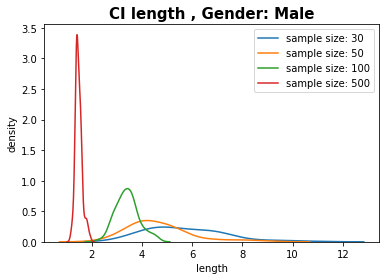

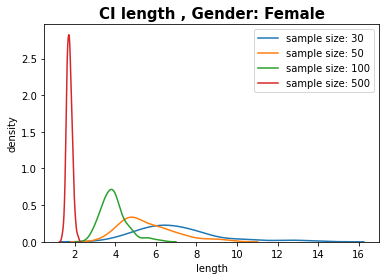

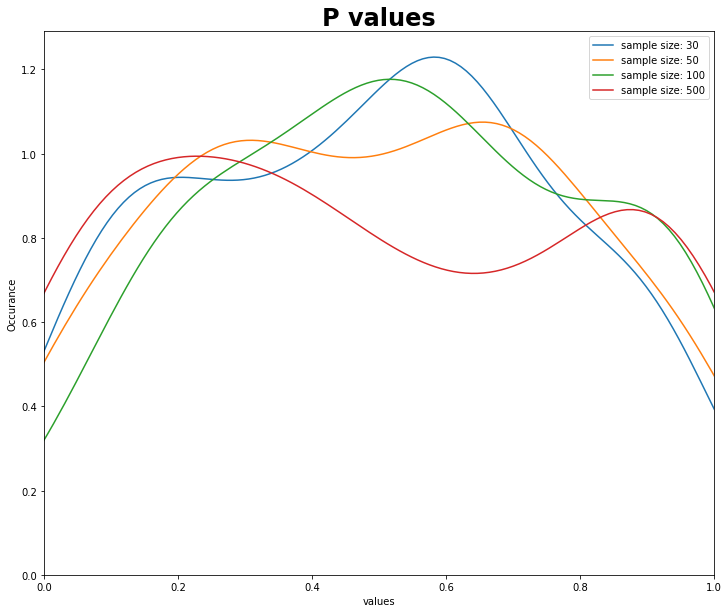

In [703]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

for sample_size, CI_list in males_CI_dict.items():
    sns.distplot(CI_list, label=f"sample size: {sample_size}", hist=False, kde=True)
    plt.plot()
    
plt.title("CI length , Gender: Male", size=15, fontweight="bold")
plt.xlabel("length")
plt.ylabel("density")
plt.legend()
plt.show()

for sample_size, CI_list in females_CI_dict.items():
    sns.distplot(CI_list, label=f"sample size: {sample_size}", hist=False, kde=True)
    plt.plot()
    
plt.title("CI length , Gender: Female", size=15, fontweight="bold")
plt.xlabel("length")
plt.ylabel("density")
plt.legend()
plt.show()   

fig = plt.figure(figsize=(12, 10)) 
for sample_size, P_values_list in p_values_dict.items():
    print(P_values_list)
    sns.distplot(P_values_list, label=f"sample size: {sample_size}", hist=False,kde=True)
    plt.plot()
   
plt.title("P values", size=24, fontweight="bold")
plt.xlabel("values")
plt.ylabel("Occurance")
plt.xlim(0, 1)
plt.legend()

plt.show()



In [704]:
# Calculating the percentage of times that the average of each category appeared in the CI
print("for males:")
for i in [30, 50, 100, 500]:
    print("the real average appeared in {}% of the CI' for sample size of {} ".format(CI_dict[i][0], i))

print("for females:")
for i in [30, 50, 100, 500]:
    print("the real average appeared in {}% of the CI' for sample size of {}".format(CI_dict[i][1], i))

for males:
the real average appeared in 95% of the CI' for sample size of 30 
the real average appeared in 96% of the CI' for sample size of 50 
the real average appeared in 96% of the CI' for sample size of 100 
the real average appeared in 92% of the CI' for sample size of 500 
for females:
the real average appeared in 96% of the CI' for sample size of 30
the real average appeared in 94% of the CI' for sample size of 50
the real average appeared in 92% of the CI' for sample size of 100
the real average appeared in 91% of the CI' for sample size of 500


We chose to visualize the length of the C.I's and the P-values we received in the 100 repetitions by density functions. 

An insight from the C.I's graphs above is that as we saw before in the numbers, the bigger the sample size, the smaller the C.I length. This insight is derived from the fact that the sample size affects the SE estimator that is used in the CI formula.

As for the p-values graph, we cannot see a clear trend in the graphs, even though we expected to see the peaks of the higher sample size curves closer to 0. Perhaps the reason for that is that the overall difference is quite small (~0.15 in the entire dataset), and the variance in the BMI category is quite high (the std of the BMI for the entire dataset is ~6.5), which reduces the overall effect of the sample size on the P-value. Another reason is that the estimator is not necessarily normally distributed as we discussed before.

Also, we see that the real average appeared in about 95% of the times in the CI, no matter the sample size. This result is not surprising as we chose alpha to be 0.05, and alpha indicates the chance that the  real average will NOT appear in the CI by definition.